In [ ]:
!git clone https://github.com/p595939247/data.git


fatal: destination path 'data' already exists and is not an empty directory.


In [164]:
import pandas as pd

# 讀取CSV檔案
df = pd.read_csv('/content/data/Tweets.csv')

# 顯示前五行
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:

# 查看資料的維度
data_shape = df.shape
print(f"資料的維度: {data_shape} (資料筆數, 屬性數)")

# 查看資料的屬性名稱
columns = df.columns
print("資料的屬性名稱:")
print(columns)

# 查看每個屬性的型態
dtypes = df.dtypes
print("每個屬性的型態:")
print(dtypes)

# 計算每個屬性的唯一值個數
unique_counts = df.nunique()
print("每個屬性的唯一值個數:")
print(unique_counts)

# 計算每個屬性的空缺值數量
missing_values = df.isnull().sum()
print("每個屬性的空缺值數量:")
print(missing_values)


資料的維度: (14640, 15) (資料筆數, 屬性數)
資料的屬性名稱:
Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
每個屬性的型態:
tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object
每個屬性的唯一

In [ ]:
# 將 'tweet_created' 欄位轉換為日期型態
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# 檢查轉換後的型態
print(df['tweet_created'].dtypes)

datetime64[ns, UTC-08:00]


In [ ]:
# 找到最早和最晚的日期
earliest_date = df['tweet_created'].min()
latest_date = df['tweet_created'].max()

print(f"最早的日期: {earliest_date}")
print(f"最晚的日期: {latest_date}")


最早的日期: 2015-02-16 23:36:05-08:00
最晚的日期: 2015-02-24 11:53:37-08:00


In [ ]:
# 計算 'tweet_created' 中的唯一日期數量
unique_dates_count = df['tweet_created'].dt.date.nunique()

print(f"不同日期的數量: {unique_dates_count}")


不同日期的數量: 9


In [ ]:
# 按照日期分組並計算每個日期的推文數量
tweets_per_date = df['tweet_created'].dt.date.value_counts().sort_index()

print("每個日期的推文數量:")
print(tweets_per_date)


每個日期的推文數量:
tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
Name: count, dtype: int64


In [ ]:
# 計算每個屬性的缺失值數量
missing_values_count = df.isnull().sum()

# 計算每個屬性的總資料數
total_count = len(df)

# 計算每個屬性缺失值的百分比
missing_values_percentage = (missing_values_count / total_count) * 100

print("每個屬性缺失值佔的百分比:")
print(missing_values_percentage)


每個屬性缺失值佔的百分比:
tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64


In [ ]:
# 刪除指定的三個屬性
df = df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

# 檢查刪除後的 DataFrame
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)


In [ ]:
# 計算 'negativereason' 屬性中不同負面理由的頻率
negative_reason_counts = df['negativereason'].value_counts()

print("不同負面理由的頻率:")
print(negative_reason_counts)


不同負面理由的頻率:
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


<ipython-input-149-f7e1c378c1b6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


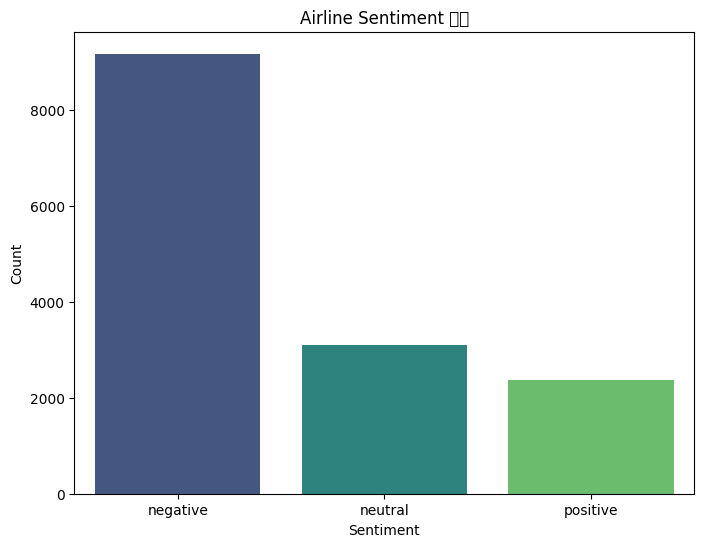

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算 'airline_sentiment' 屬性中每種類型情緒的頻率
sentiment_counts = df['airline_sentiment'].value_counts()

# 設定圖形的大小
plt.figure(figsize=(8, 6))

# 使用 seaborn 繪製柱狀圖
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# 添加標題和標籤
plt.title('Airline Sentiment 分佈')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# 顯示圖形
plt.show()

In [ ]:
import pandas as pd

# 查看 'airlines' 屬性中的不同航空公司
unique_airlines = df['airline'].unique()
print("不同的航空公司:")
print(unique_airlines)


不同的航空公司:
['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

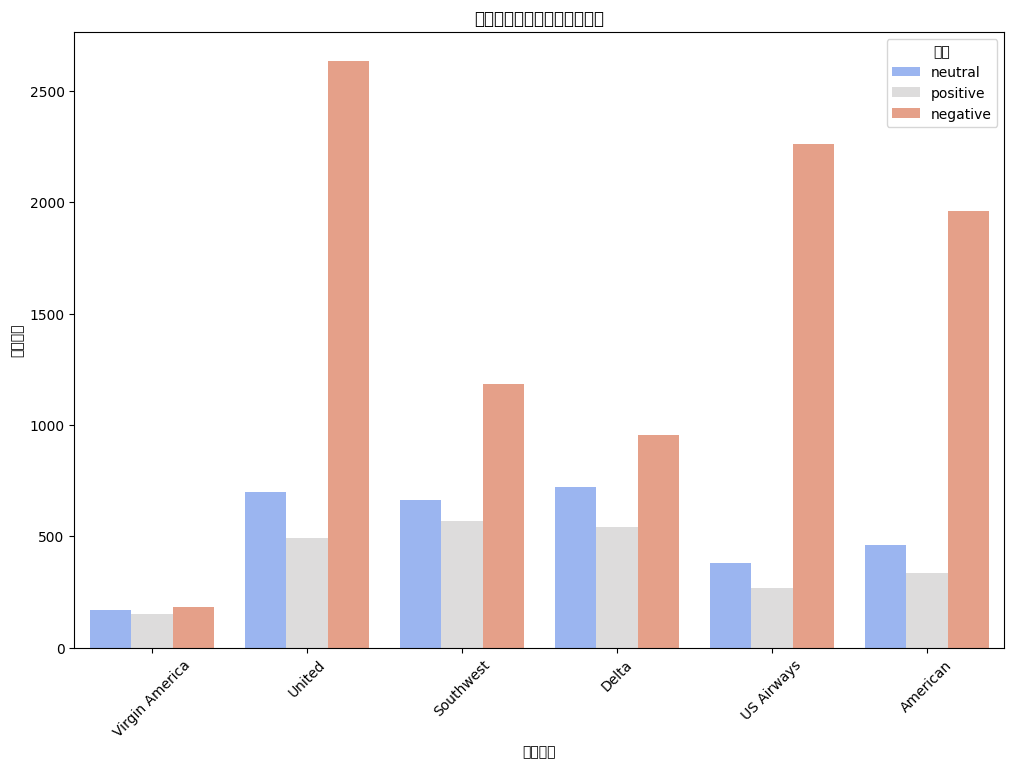

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖形的大小
plt.figure(figsize=(12, 8))

# 使用 seaborn 繪製分面柱狀圖
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette="coolwarm")

# 添加標題和標籤
plt.title('不同航空公司收到的情緒分佈')
plt.xlabel('航空公司')
plt.ylabel('推文數量')

# 顯示圖形
plt.xticks(rotation=45)  # 使 x 軸標籤斜向顯示，方便閱讀
plt.legend(title='情緒')
plt.show()


In [ ]:
import pandas as pd

# 計算每間航空公司的總推文數量
total_counts = df['airline'].value_counts()

# 計算每間航空公司的負面推文數量
negative_counts = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()

# 計算每間航空公司負面推文的百分比
negative_percentage = (negative_counts / total_counts) * 100

print("每間航空公司負面推文的百分比:")
print(negative_percentage)


每間航空公司負面推文的百分比:
airline
United            68.890633
US Airways        77.686234
American          71.040232
Southwest         49.008264
Delta             42.979298
Virgin America    35.912698
Name: count, dtype: float64


<ipython-input-153-ad8edaa4e633>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_percentage.index, y=negative_percentage.values, palette="viridis")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2

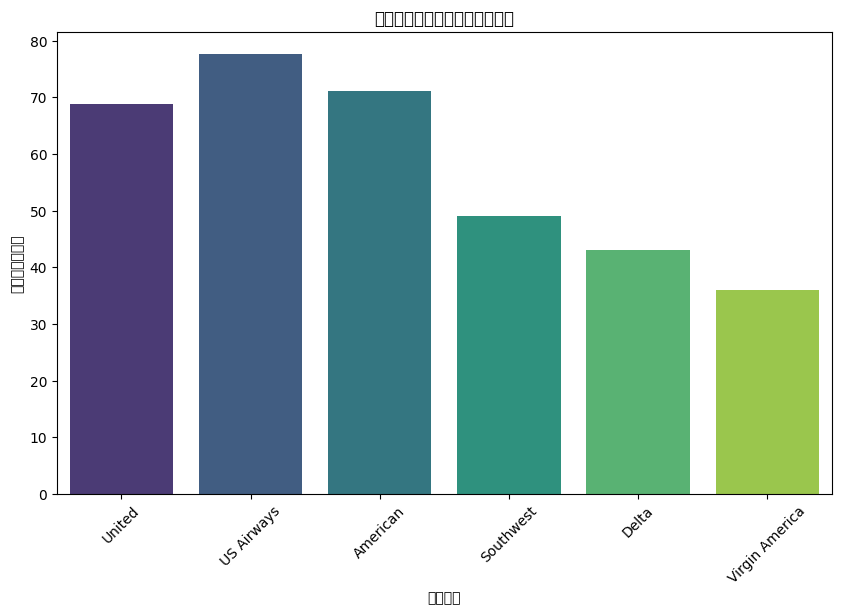

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定圖形的大小
plt.figure(figsize=(10, 6))

# 創建柱狀圖
sns.barplot(x=negative_percentage.index, y=negative_percentage.values, palette="viridis")

# 添加標題和標籤
plt.title('每間航空公司負面推文的百分比')
plt.xlabel('航空公司')
plt.ylabel('負面推文百分比')

# 顯示圖形
plt.xticks(rotation=45)  # 使 x 軸標籤斜向顯示，方便閱讀
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27599 (\N{CJK UNIFIED IDEOGRAPH-6BCF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

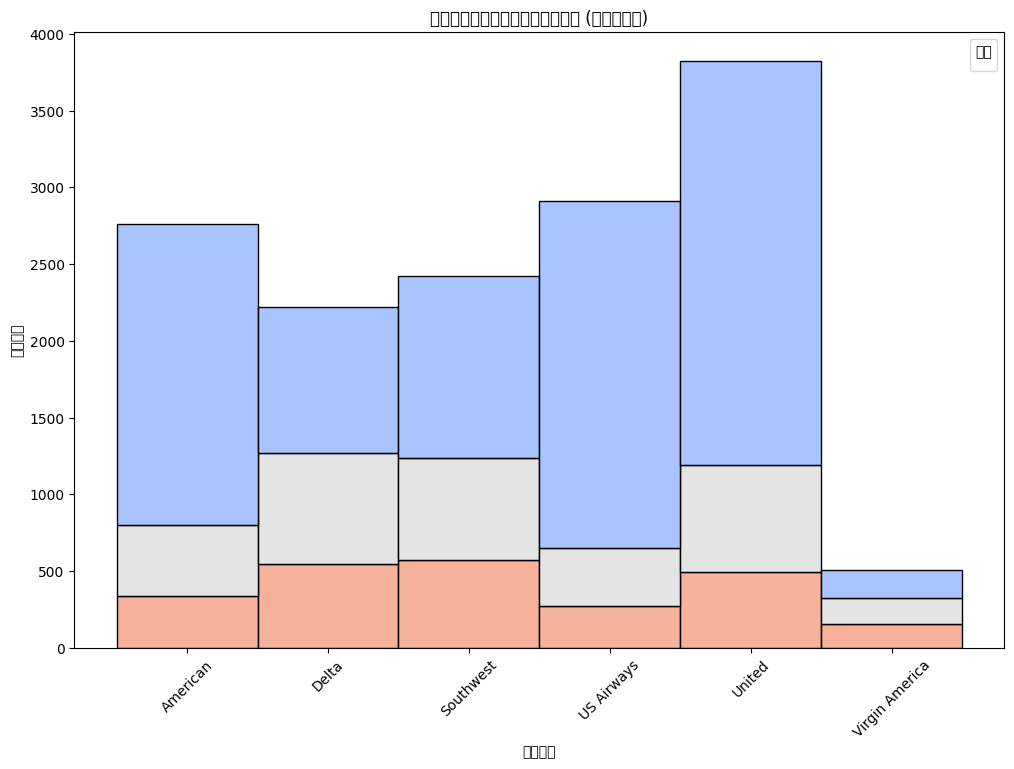

In [ ]:
# 計算每間航空公司不同情緒的數量
sentiment_counts = df.groupby(['airline', 'airline_sentiment']).size().reset_index(name='count')

# 設定圖形的大小
plt.figure(figsize=(12, 8))

# 使用 seaborn 繪製堆積長條圖
sns.histplot(data=sentiment_counts, x='airline', hue='airline_sentiment', weights='count', multiple='stack', palette="coolwarm")

# 添加標題和標籤
plt.title('每間航空公司不同情緒的推文數量 (堆積長條圖)')
plt.xlabel('航空公司')
plt.ylabel('推文數量')

# 顯示圖形
plt.xticks(rotation=45)  # 使 x 軸標籤斜向顯示，方便閱讀
plt.legend(title='情緒')
plt.show()


<ipython-input-155-f98aa5088af4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, ax=ax, palette="viridis")
<ipython-input-155-f98aa5088af4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, ax=ax, palette="viridis")
<ipython-input-155-f98aa5088af4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_count.index, y=word_count.values, ax=ax, palette="viridis")
<ipython-input-155-f98aa5088af4>:21: FutureWarning: 

Passing `palette` without assigning `hue` i

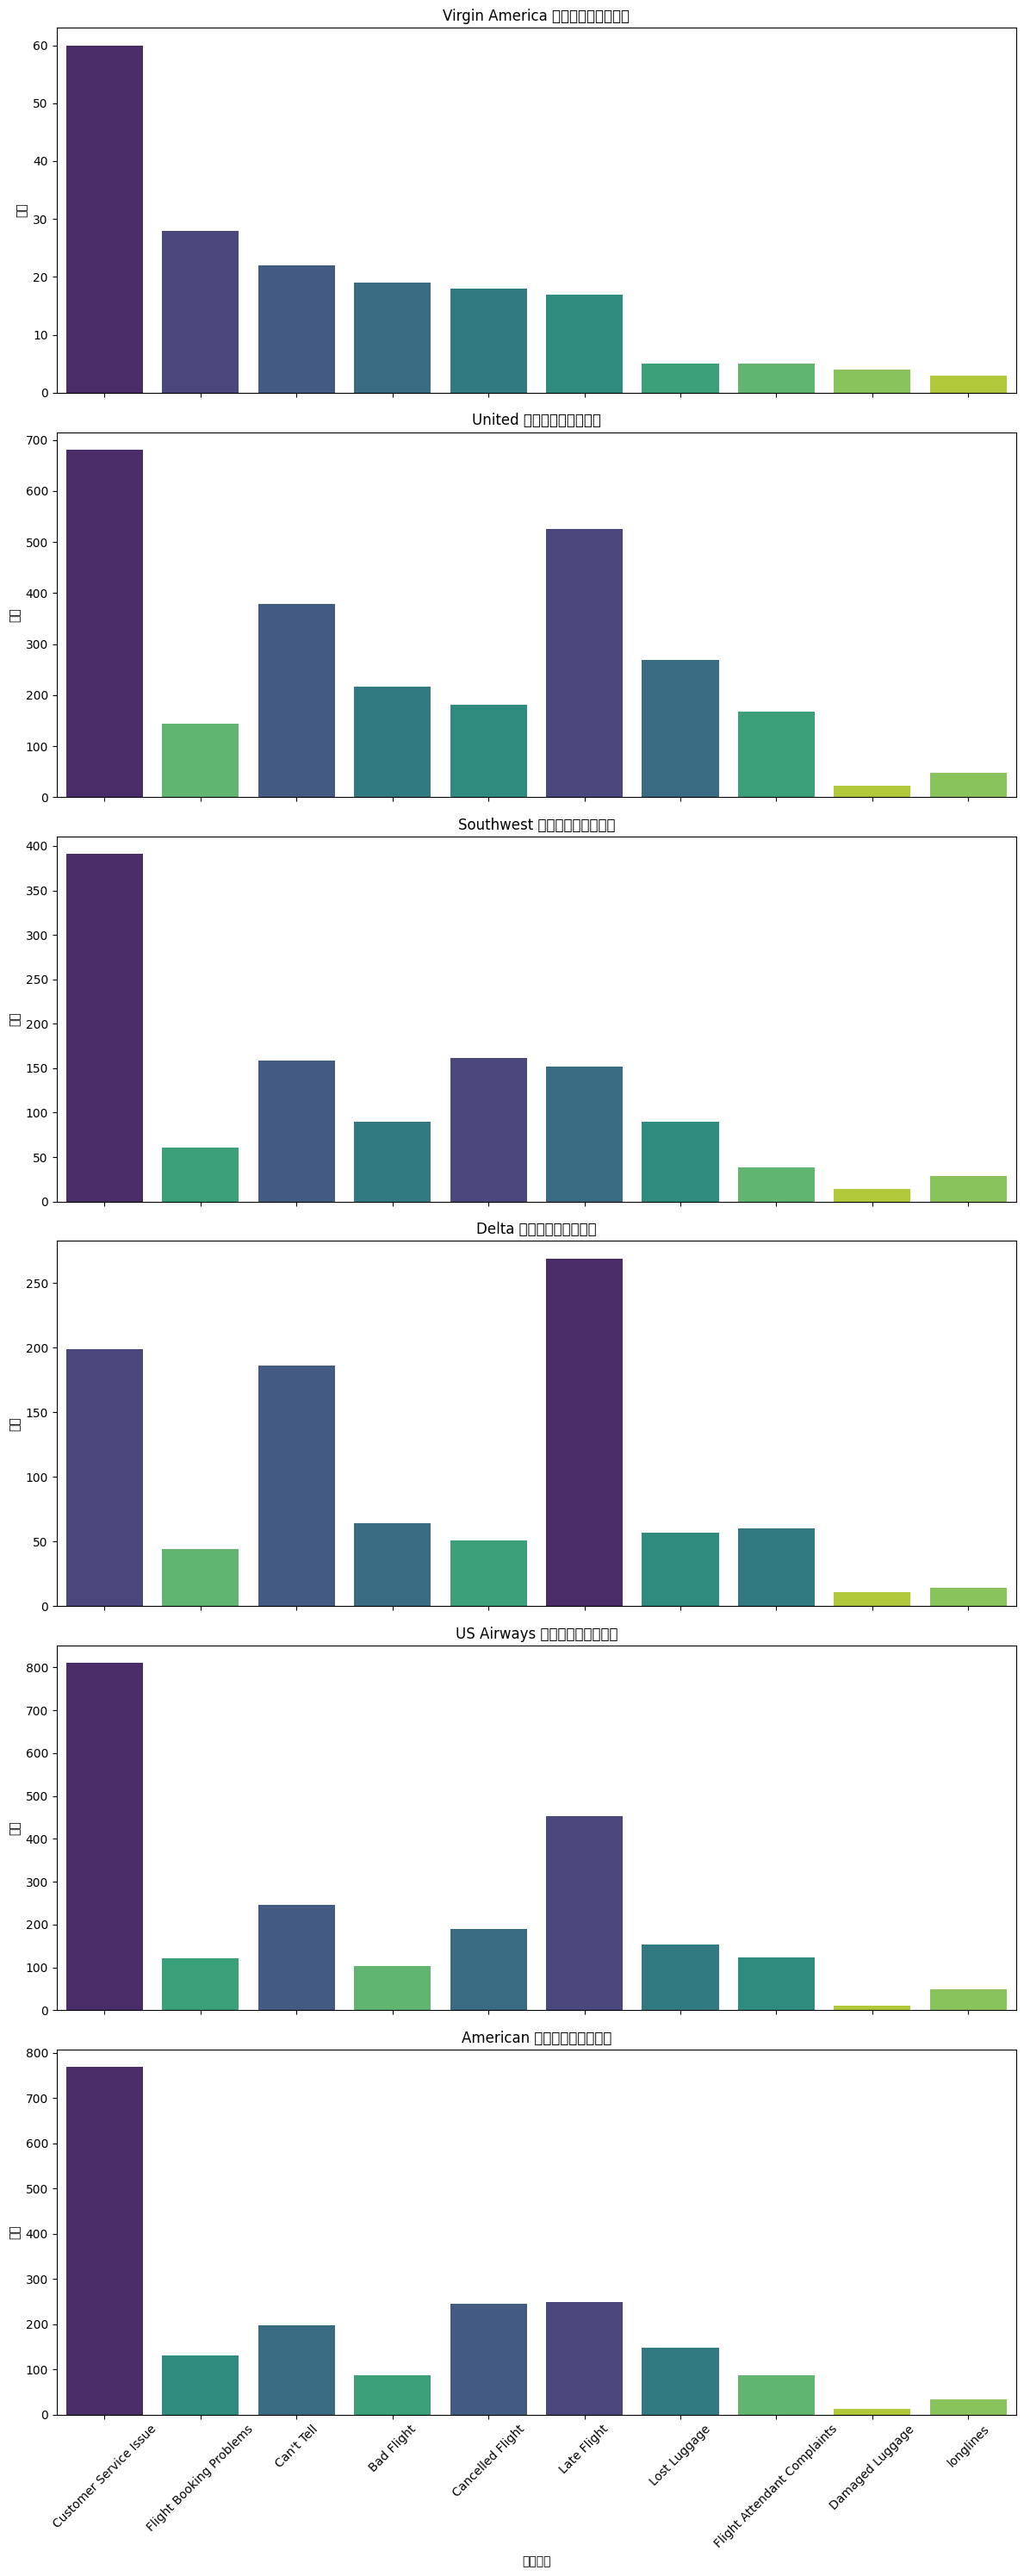

In [ ]:
# 過濾出負面推文
negative_df = df[df['airline_sentiment'] == 'negative']

# 按航空公司分組，計算每間航空公司負面評論中各字詞的計數
word_counts = {}
for airline in negative_df['airline'].unique():
    # 選擇該航空公司的負面推文
    airline_negatives = negative_df[negative_df['airline'] == airline]

    # 計算每個負面理由的字詞計數
    word_count = airline_negatives['negativereason'].value_counts()

    # 將結果存儲到字典中
    word_counts[airline] = word_count

# 創建一個長條圖，每間航空公司一個子圖
fig, axes = plt.subplots(nrows=len(word_counts), ncols=1, figsize=(12, 5 * len(word_counts)), sharex=True)

# 繪製每間航空公司的長條圖
for ax, (airline, word_count) in zip(axes, word_counts.items()):
    sns.barplot(x=word_count.index, y=word_count.values, ax=ax, palette="viridis")
    ax.set_title(f'{airline} 的負面評論字詞計數')
    ax.set_xlabel('負面理由')
    ax.set_ylabel('計數')
    ax.tick_params(axis='x', rotation=45)  # 使 x 軸標籤斜向顯示，方便閱讀

# 調整佈局
plt.tight_layout()

# 顯示圖形
plt.show()


<ipython-input-156-0f221250fec1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['date'] = negative_df['tweet_created'].dt.date
<ipython-input-156-0f221250fec1>:25: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-156-0f221250fec1>:25: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
<ipython-input-156-0f221250fec1>:25: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from current font.
  plt.tight_layout()
<ipython-input-156-0f221250fec1>:25: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  plt.tight_layout()
<ipython-input-156-0f221250fec1>:25: UserWa

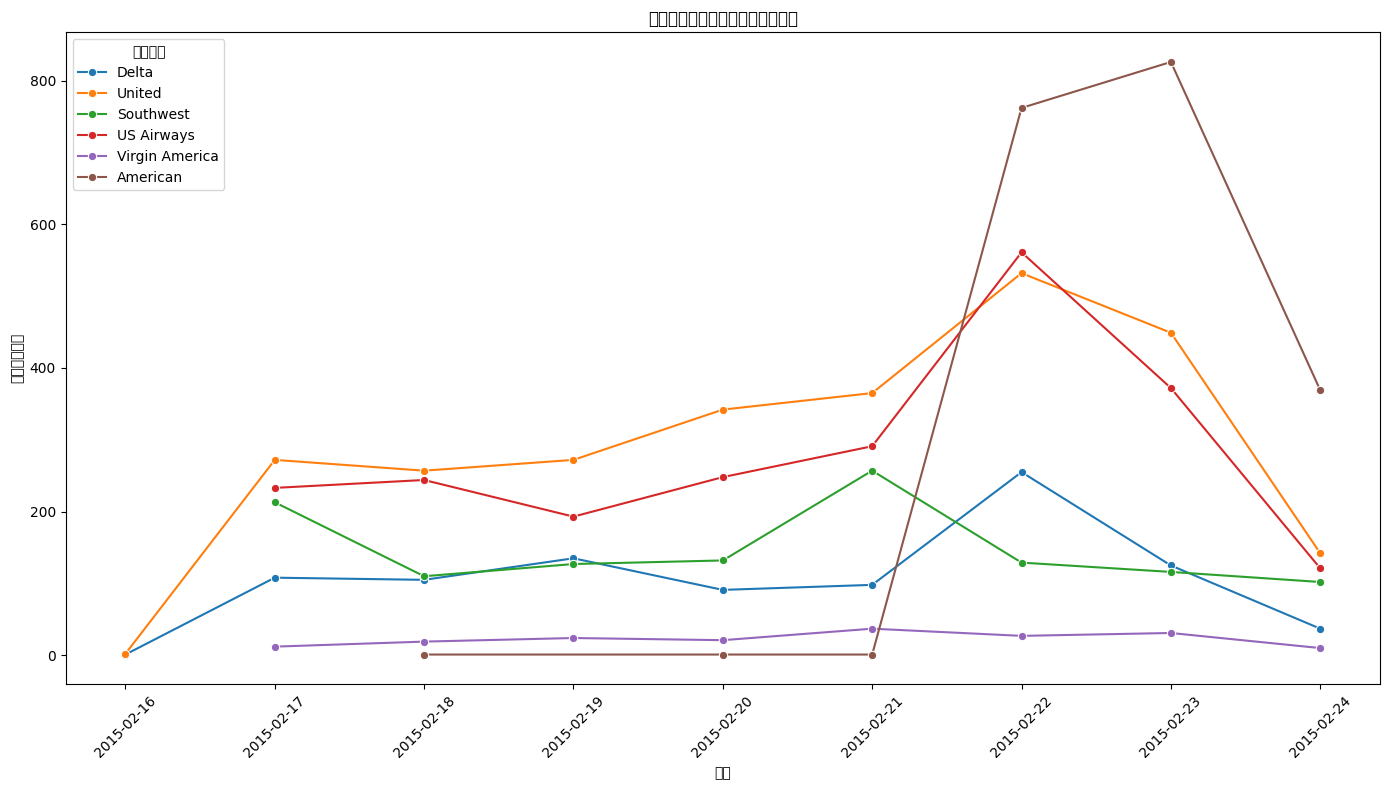

In [ ]:
# 將 'tweet_created' 欄位轉換為日期型態
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# 過濾出負面推文
negative_df = df[df['airline_sentiment'] == 'negative']

# 提取日期部分並按日期和航空公司分組計算每組的推文數量
negative_df['date'] = negative_df['tweet_created'].dt.date
daily_negative_counts = negative_df.groupby(['date', 'airline']).size().reset_index(name='count')

# 設定圖形的大小
plt.figure(figsize=(14, 8))

# 使用 seaborn 繪製堆積長條圖
sns.lineplot(data=daily_negative_counts, x='date', y='count', hue='airline', marker='o')

# 添加標題和標籤
plt.title('每日每家航空公司的負面推文數量')
plt.xlabel('日期')
plt.ylabel('負面推文數量')

# 顯示圖形
plt.xticks(rotation=45)  # 使 x 軸標籤斜向顯示，方便閱讀
plt.legend(title='航空公司')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

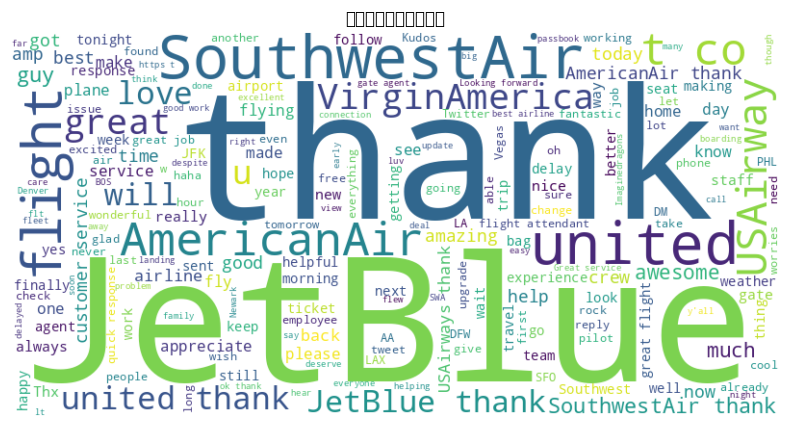

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 過濾出正面推文
positive_df = df[df['airline_sentiment'] == 'positive']

# 合併所有正面推文的文本
text = ' '.join(positive_df['text'].astype(str))

# 創建文字雲對象
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示座標軸
plt.title('正面評論中的最常見字')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36000 (\N{CJK UNIFIED IDEOGRAPH-8CA0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38754 (\N{CJK UNIFIED IDEOGRAPH-9762}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35542 (\N{CJK UNIFIED IDEOGRAPH-8AD6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

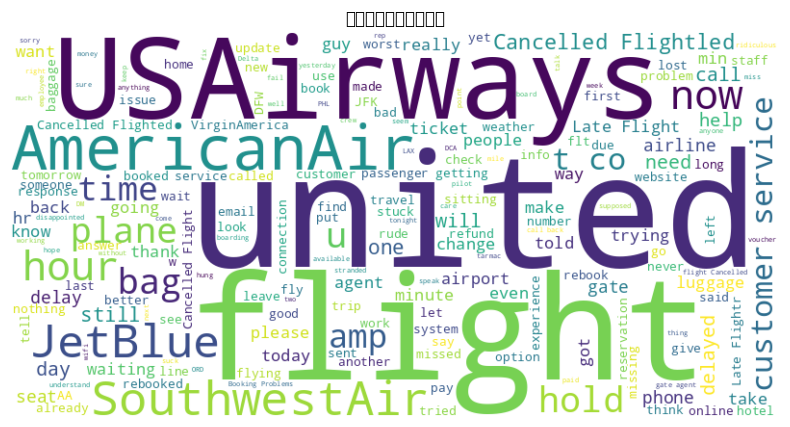

In [ ]:
# 過濾出負面推文
negative_df = df[df['airline_sentiment'] == 'negative']

# 合併所有負面推文的文本
text = ' '.join(negative_df['text'].astype(str))

# 創建文字雲對象
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不顯示座標軸
plt.title('負面評論中的最常見字')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Display the number of data before processing
print(f"Display the number of data before processing: {df.shape[0]}")

# Delete tweets with neutral sentiment
df = df[df['airline_sentiment'] != 'neutral']

# Display the number of processed data
print(f"Display the number of processed data: {df.shape[0]}")


# Tag-encode the 'airline_sentiment' attribute
df['airline_sentiment_encoded'], sentiment_labels = pd.factorize(df['airline_sentiment'])

# Display the label encoding results and corresponding category labels
print("Tag encoding results:")
print(df[['airline_sentiment', 'airline_sentiment_encoded']].drop_duplicates().sort_values('airline_sentiment_encoded'))

print("\nEmotion label correspondence:")
for label, sentiment in enumerate(sentiment_labels):
    print(f"{label}: {sentiment}")



Display the number of data before processing: 14640
Display the number of processed data: 11541
Tag encoding results:
  airline_sentiment  airline_sentiment_encoded
1          positive                          0
3          negative                          1

Emotion label correspondence:
0: positive
1: negative


<ipython-input-159-eb791446bb67>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment_encoded'], sentiment_labels = pd.factorize(df['airline_sentiment'])


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# 下載停用詞庫（如果尚未下載）
nltk.download('stopwords')
nltk.download('punkt')


# 清理文本函數
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # 去除網址
    text = re.sub(r'@\S+', '', text)     # 去除提及
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # 去除標點符號和數字
    text = text.lower()  # 轉小寫
    return text

# 去除停用詞和詞幹化函數
def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)  # 分詞
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # 去除停用詞
    # 使用詞幹化 (可選)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# 應用預處理
df['cleaned_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split

# 訓練集和測試集的分割
X = df['cleaned_text']
y = df['airline_sentiment_encoded']  # 使用標籤編碼後的情緒標籤

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"訓練集大小: {len(X_train)}")
print(f"測試集大小: {len(X_test)}")


訓練集大小: 9232
測試集大小: 2309


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 創建 TF-IDF 向量化器
vectorizer = TfidfVectorizer(max_features=10000)  # 可以調整 max_features 根據需要

# 將文本轉換為特徵向量
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

print(f"訓練集特徵向量形狀: {X_train_vect.shape}")
print(f"測試集特徵向量形狀: {X_test_vect.shape}")


訓練集特徵向量形狀: (9232, 7459)
測試集特徵向量形狀: (2309, 7459)


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


# 創建並訓練 SVM 模型
model = SVC(kernel='linear')  # 使用線性核
model.fit(X_train_vect, y_train)

# 預測測試集
y_pred = model.predict(X_test_vect)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"模型準確率: {accuracy:.4f}")
print("分類報告:")
print(report)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


模型準確率: 0.9095
分類報告:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       447
           1       0.92      0.97      0.95      1862

    accuracy                           0.91      2309
   macro avg       0.88      0.82      0.84      2309
weighted avg       0.91      0.91      0.91      2309

